<a href="https://colab.research.google.com/github/statzenthusiast921/Personal-Projects/blob/main/Twint_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Restart runtime
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.1 MB 19.0 MB/s 
     |████████████████████████████████| 263 kB 41.7 MB/s 
     |████████████████████████████████| 385 kB 37.9 MB/s 
     |████████████████████████████████| 192 kB 61.9 MB/s 
     |████████████████████████████████| 160 kB 64.0 MB/s 
     |██████████████████████

In [2]:
!pip install twint
!pip install googletransx
!pip install aiohttp==3.7.0
import googletransx
import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re

     |████████████████████████████████| 1.3 MB 20.9 MB/s 
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.1
    Uninstalling async-timeout-4.0.1:
      Successfully uninstalled async-timeout-4.0.1
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.1
    Uninstalling aiohttp-3.8.1:
      Successfully uninstalled aiohttp-3.8.1


In [211]:
c = twint.Config()
c.Pandas = True
c.Store_csv = True
c.Search="#TheOffice"
c.Limit = 100
c.Lang = "en"
c.Since = "2011-5-19"
c.Until = "2011-5-21"
twint.run.Search(c)
df = twint.storage.panda.Tweets_df 

71726679202082816 2011-05-20 23:59:07 +0000 <Shikeerah> I'm hooked on the Basketball episode of #TheOffice because of @_HolsterVille
71726471860858880 2011-05-20 23:58:18 +0000 <RiotTapes> "Shut up about the sun! SHUT UP ABOUT THE SUN!!" #theoffice
71725911803838464 2011-05-20 23:56:04 +0000 <Rello91> One of my fav shows #theoffice
71725854975213568 2011-05-20 23:55:51 +0000 <droyer54> I forgot how much i love #theoffice
71725836834848768 2011-05-20 23:55:46 +0000 <Bduff9> I'm in love with Jim Halpert #theoffice
71725639811608576 2011-05-20 23:54:59 +0000 <NESSessarilyV> I couldn't breathe... watching #TheOffice
71725321191297024 2011-05-20 23:53:43 +0000 <Ziggy66> I am watching The Office w/142 others  http://bit.ly/lEGSOh @GetGlue #TheOffice
71724916399022080 2011-05-20 23:52:07 +0000 <themahler> Part 1 of #TheOffice season finale complete. Gotta admit, I'm excited for Jim Carrey in Part 2.
71724651063148544 2011-05-20 23:51:04 +0000 <dresdenm> Shut up about the sun. SHUT UP ABOUT TH

In [212]:
df_eng = df[df['language']=='en']
df_eng.shape

(37, 38)

In [213]:
#s7ep1 = df_eng
#s7ep2 = df_eng
#s7ep3 = df_eng
#s7ep4 = df_eng
#s7ep5 = df_eng
#s7ep6 = df_eng
#s7ep7 = df_eng
#s7ep8 = df_eng
#s7ep9 = df_eng
#s7ep10 = df_eng
#s7ep11 = df_eng
#s7ep12 = df_eng
#s7ep13 = df_eng
#s7ep14 = df_eng
#s7ep15 = df_eng
#s7ep16 = df_eng
#s7ep17 = df_eng
#s7ep18 = df_eng
#s7ep19 = df_eng
#s7ep20 = df_eng
#s7ep21 = df_eng
#s7ep22 = df_eng
#s7ep23 = df_eng
s7ep24 = df_eng

In [214]:
s7ep24['date'].unique()

array(['2011-05-20 23:59:07', '2011-05-20 23:58:18',
       '2011-05-20 23:56:04', '2011-05-20 23:55:51',
       '2011-05-20 23:55:46', '2011-05-20 23:54:59',
       '2011-05-20 23:53:43', '2011-05-20 23:52:07',
       '2011-05-20 23:51:04', '2011-05-20 23:50:09',
       '2011-05-20 23:49:17', '2011-05-20 23:49:16',
       '2011-05-20 23:48:58', '2011-05-20 23:47:35',
       '2011-05-20 23:46:00', '2011-05-20 23:45:50',
       '2011-05-20 23:45:17', '2011-05-20 23:44:48',
       '2011-05-20 23:44:11', '2011-05-20 23:42:23',
       '2011-05-20 23:40:19', '2011-05-20 23:39:05',
       '2011-05-20 23:39:04', '2011-05-20 23:38:43',
       '2011-05-20 23:37:52', '2011-05-20 23:37:40',
       '2011-05-20 23:37:12', '2011-05-20 23:36:41',
       '2011-05-20 23:36:28', '2011-05-20 23:34:23',
       '2011-05-20 23:32:10', '2011-05-20 23:30:04',
       '2011-05-20 23:29:57', '2011-05-20 23:29:50',
       '2011-05-20 23:29:32', '2011-05-20 23:26:43',
       '2011-05-20 23:26:29'], dtype=object)

In [215]:
s7ep1['se_ep']='s7ep1'
s7ep2['se_ep']='s7ep2'
s7ep3['se_ep']='s7ep3'
s7ep4['se_ep']='s7ep4'
s7ep5['se_ep']='s7ep5'
s7ep6['se_ep']='s7ep6'
s7ep7['se_ep']='s7ep7'
s7ep8['se_ep']='s7ep8'
s7ep9['se_ep']='s7ep9'
s7ep10['se_ep']='s7ep10'
s7ep11['se_ep']='s7ep11'
s7ep12['se_ep']='s7ep12'
s7ep13['se_ep']='s7ep13'
s7ep14['se_ep']='s7ep14'
s7ep15['se_ep']='s7ep15'
s7ep16['se_ep']='s7ep16'
s7ep17['se_ep']='s7ep17'
s7ep18['se_ep']='s7ep18'
s7ep19['se_ep']='s7ep19'
s7ep20['se_ep']='s7ep20'
s7ep21['se_ep']='s7ep21'
s7ep22['se_ep']='s7ep22'
s7ep23['se_ep']='s7ep23'
s7ep24['se_ep']='s7ep24'




frames = [s7ep1, s7ep2, s7ep3, s7ep4,
          s7ep5, s7ep6, s7ep7, s7ep8,
          s7ep9, s7ep10, s7ep11, s7ep12,
          s7ep13, s7ep14, s7ep15, s7ep16,
          s7ep17, s7ep18, s7ep19, s7ep20,
          s7ep21, s7ep22, s7ep23, s7ep24]

result = pd.concat(frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [216]:
result.shape

(1188, 39)

In [234]:
# from google.colab import files
# result.to_csv('season7_tweets.csv') 
# files.download('season7_tweets.csv')
from google.colab import files
uploaded = files.upload()

Saving season7_tweets.csv to season7_tweets (3).csv


In [236]:
import pandas as pd
df_tweets = pd.read_csv('/content/season7_tweets (3).csv')
df_tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,se_ep,ep,season,episode
0,0,2.545051e+10,2.545051e+10,1.290000e+12,9/24/10 23:58,0,NaN,who watched the #theoffice last night? It was ...,en,['theoffice'],[],34772864,34772864,AmbeyLambey,Amber,5,23,https://twitter.com/AmbeyLambey/status/2545050...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1
1,1,2.545043e+10,2.545043e+10,1.290000e+12,9/24/10 23:57,0,NaN,Turn off the Chumbawumba and scram! #TheOffice,en,['theoffice'],[],7544052,7544052,SilverNeurotic,Nikole Talks a Lot,5,23,https://twitter.com/SilverNeurotic/status/2545...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1
2,2,2.545040e+10,2.545040e+10,1.290000e+12,9/24/10 23:56,0,NaN,"Yeah, I'd totally fire someone for screwing up...",en,['theoffice'],[],7544052,7544052,SilverNeurotic,Nikole Talks a Lot,5,23,https://twitter.com/SilverNeurotic/status/2545...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1
3,3,2.545037e+10,2.545037e+10,1.290000e+12,9/24/10 23:56,0,NaN,I am watching The Office #TheOffice http://bi...,en,['theoffice'],[],173902647,173902647,deanmartinuk,DΞano,5,23,https://twitter.com/deanmartinuk/status/254503...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1
4,4,2.545026e+10,2.545026e+10,1.290000e+12,9/24/10 23:54,0,NaN,"Who's the new Office guy? ""My favorite movies ...",en,"['theoffice', 'luke']",[],14335531,14335531,bryceuk,BryceUK,5,23,https://twitter.com/bryceuk/status/25450259114,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1


In [237]:
import re

#Clean the tweets
def clean(raw):
  result = re.sub("<[a][^>]*>(.+?)</[a]>",'Link.',raw)
  result = re.sub('&gt;',"", result)
  result = re.sub('&#x27;',"'", result)
  result = re.sub('&quot;','"', result)
  result = re.sub('&#x2F;',' ', result)
  result = re.sub('<p>',' ', result)
  result = re.sub('</i>','', result)
  result = re.sub('&#62;','', result)
  result = re.sub('<i>',' ', result)
  result = re.sub("\n", '', result)
  return result

In [238]:
df_tweets['clean_tweet'] = df_tweets['tweet'].apply(func=clean)
df_tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,se_ep,ep,season,episode,clean_tweet
0,0,2.545051e+10,2.545051e+10,1.290000e+12,9/24/10 23:58,0,NaN,who watched the #theoffice last night? It was ...,en,['theoffice'],[],34772864,34772864,AmbeyLambey,Amber,5,23,https://twitter.com/AmbeyLambey/status/2545050...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1,who watched the #theoffice last night? It was ...
1,1,2.545043e+10,2.545043e+10,1.290000e+12,9/24/10 23:57,0,NaN,Turn off the Chumbawumba and scram! #TheOffice,en,['theoffice'],[],7544052,7544052,SilverNeurotic,Nikole Talks a Lot,5,23,https://twitter.com/SilverNeurotic/status/2545...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1,Turn off the Chumbawumba and scram! #TheOffice
2,2,2.545040e+10,2.545040e+10,1.290000e+12,9/24/10 23:56,0,NaN,"Yeah, I'd totally fire someone for screwing up...",en,['theoffice'],[],7544052,7544052,SilverNeurotic,Nikole Talks a Lot,5,23,https://twitter.com/SilverNeurotic/status/2545...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1,"Yeah, I'd totally fire someone for screwing up..."
3,3,2.545037e+10,2.545037e+10,1.290000e+12,9/24/10 23:56,0,NaN,I am watching The Office #TheOffice http://bi...,en,['theoffice'],[],173902647,173902647,deanmartinuk,DΞano,5,23,https://twitter.com/deanmartinuk/status/254503...,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1,I am watching The Office #TheOffice http://bi...
4,4,2.545026e+10,2.545026e+10,1.290000e+12,9/24/10 23:54,0,NaN,"Who's the new Office guy? ""My favorite movies ...",en,"['theoffice', 'luke']",[],14335531,14335531,bryceuk,BryceUK,5,23,https://twitter.com/bryceuk/status/25450259114,[],[],0,NaN,False,0,0,0,NaN,#TheOffice,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,s7ep1,ep,7,1,"Who's the new Office guy? ""My favorite movies ..."


In [239]:
# user1 = df_tweets[df_tweets['user_id_str']==75195164]
# user1['clean_tweet']
#df_tweets = df_tweets[df_tweets['user_id_str']!=75195164]
#df_tweets = df_tweets[~df_tweets["clean_tweet"].str.contains("sex",case=False)]
df_tweets.shape

(1188, 44)

In [240]:
df_tweets['episode'] = df_tweets['episode'].astype(str)

episode_tweet_count = df_tweets.groupby(['episode']).size()
episode_tweet_count = pd.DataFrame(episode_tweet_count).reset_index()
episode_tweet_count = episode_tweet_count.set_axis(['Episode', 'Count'], axis=1, inplace=False)
episode_tweet_count = episode_tweet_count.sort_values(by='Count',ascending=False)
episode_tweet_count

,Episode,Count
22,8,91
5,14,76
15,23,71
9,18,58
2,11,55
20,6,54
8,17,54
13,21,54
18,4,53
1,10,53


In [241]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [242]:
sid = SentimentIntensityAnalyzer()
df_tweets['scores'] = df_tweets['clean_tweet'].apply(lambda clean_tweet: sid.polarity_scores(clean_tweet))
df_tweets['compound']  = df_tweets['scores'].apply(lambda score_dict: score_dict['compound'])
df_tweets['comp_score'] = df_tweets['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [243]:
max = df_tweets['compound'].max()
min = df_tweets['compound'].min()

In [244]:
most_pos = df_tweets[df_tweets['compound']==max]
most_pos['clean_tweet']

780    Love Michael Scarn and Goldenface, I love #the...
Name: clean_tweet, dtype: object

In [246]:
most_neg = df_tweets[df_tweets['compound']==min]
most_neg['clean_tweet']

1033    If there is one thing that I hate more than th...
Name: clean_tweet, dtype: object

In [249]:
from numpy.core.numeric import full
import pandas as pd
import numpy as np
!pip install dash
import dash
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
import dash_core_components as dcc
import dash_html_components as html
!pip install dash_bootstrap_components
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output 
import plotly.express as px
import plotly.graph_objects as go
from flask import Flask, Response
import base64
from io import BytesIO
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import re
!pip install contractions
import contractions
import operator

from nltk.stem import WordNetLemmatizer 

     |████████████████████████████████| 209 kB 29.4 MB/s 
     |████████████████████████████████| 321 kB 36.9 MB/s 
     |████████████████████████████████| 284 kB 45.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=011ee3767d26e98e2194a708ac95182442f48611340ba635a8be59040b00e801
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [250]:
import nltk
nltk.download('stopwords')

def lemmatize(text):
    lemmed = contractions.fix(str(text))
    return lemmed


def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('like','um','uh','oh',' s ','and','i','I','a','and','so','this','when','it','many','so','cant','yes','no','these'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
  return new_str



#Define functions to clean up script column
def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text 

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)


def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def remove_brackets_contents(text):
    pattern = r"\[.*?\]"
    return re.sub(pattern, "", text)



#Clean up tweets
#0.) Convert column to string type
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].astype('str')
#1.) Convert to lowercase
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.lower()
#2.) Remove brackets
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = remove_brackets_contents)
#3.) Lemmatize words
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = lemmatize)
#4.) Remove stop words
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = removeStopWords)
#5.) Remove punctuation
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = punct)
#6.) Remove special characters
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = remove_special_characters)
#7.) Remove digits
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = remove_digits)
#8.) Remove stop words again created from previous functions
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(func = removeStopWords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [251]:
df_tweets['clean_tweet'].head()

0                 watched theoffice last night amazing
1                     turn chumbawumba scram theoffice
2    yeah would totally fire someone screwing coffe...
3         watching office theoffice http bit ly aohcpk
4    new office guy favorite movies citizen kane bo...
Name: clean_tweet, dtype: object


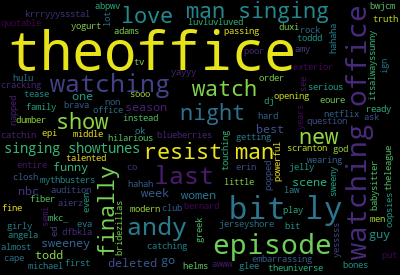

In [254]:
  new_df = df_tweets[df_tweets['episode']=='3']

  dff = new_df.copy()
  dff = dff.clean_tweet
    
  my_wordcloud = WordCloud(
        background_color='black',
        height=275,
        #min_word_length = 4

    ).generate(' '.join(dff))

  fig_wordcloud = px.imshow(my_wordcloud, template='ggplot2',
                              title="Word Cloud of Tweets")
  fig_wordcloud.update_layout(margin=dict(l=20, r=20, t=30, b=20))
  fig_wordcloud.update_xaxes(visible=False)
  fig_wordcloud.update_yaxes(visible=False)
  fig_wordcloud.show()

In [256]:
avg_sent_tweets = df_tweets.groupby('episode')['compound'].mean()
avg_sent_tweets = pd.DataFrame(avg_sent_tweets).reset_index()
avg_sent_tweets = avg_sent_tweets.set_axis(['Episode', 'Sentiment'], axis=1, inplace=False)
avg_sent_tweets = avg_sent_tweets.sort_values(by='Sentiment',ascending=False)
avg_sent_tweets

,Episode,Sentiment
11,2,0.311924
4,13,0.285870
9,18,0.279398
6,15,0.278049
19,5,0.247804
10,19,0.246484
22,8,0.225543
16,24,0.220257
2,11,0.205787
0,1,0.204946


In [108]:
from google.colab import files
df_tweets.to_csv('df_tweets_clean.csv') 
files.download('df_tweets_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>